<a href="https://colab.research.google.com/github/anmgomezmo/Advance_machine_learning_for_physics/blob/main/Hands_on/Hands_on_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First HandsOn!

In this HandsOn we will recap the basics of pyTorch with a simple classification task

Slide for the day with the Task Description ([SLIDE](https://docs.google.com/presentation/d/1k5Ad5V_8sgvdTDyRzwxOhGObPCrzT_oXOlaZ8PjMGes/edit?usp=sharing))

Jamboard for the day ([BOARD](https://jamboard.google.com/d/1ZCghO9LeJA2i7GUiNgP-pe2u4M9mCAIU3p2_Le4W510/edit?usp=sharing))

At the end of the lesson, I will put them as a pdf on the github

# Connect your drive!

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Go to the RiNNgs folder!

Use the command "cd" to change directory:

```
cd "directory"
```

then use "ls" (list) to show the files in the folder

## Are you in the correct directory ?

In [ ]:
cd /content/gdrive/MyDrive/RiNNgs/

/content/gdrive/MyDrive/RiNNgs


# What's in the directory you are in ?

In [ ]:
ls

data/  results/


In [ ]:
# We need to get some files from github

import os
success = os.path.exists("./data_preprocess.py")

if not success:
  ! wget https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data_preprocess.py

--2024-03-10 17:07:55--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data_preprocess.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14603 (14K) [text/plain]
Saving to: ‘data_preprocess.py’

data_preprocess.py  100%[===================>]  14.26K  --.-KB/s    in 0.004s  

2024-03-10 17:07:55 (3.39 MB/s) - ‘data_preprocess.py’ saved [14603/14603]



In [ ]:
ls

data/  data_preprocess.py  results/


# Lets create all the folders needed

In [ ]:
import os

def CreateDir(path):
  # Create a directory if it does not exist
  success = os.path.exists(path)
  if not success:
    os.makedirs(path)

CreateDir("results")
CreateDir("results/display")
CreateDir("results/preprocess")
CreateDir("data")

In [ ]:
success = os.path.exists("data/event_08011.file")

if not success:
  ! wget  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/event_08011.file -P data/
  ! wget -P data/ https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/RICH_map_corr_2017.data
  ! wget -P data/ https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/data_08011.json

--2024-03-10 17:11:07--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/event_08011.file
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375770 (367K) [application/octet-stream]
Saving to: ‘data/event_08011.file’

event_08011.file    100%[===================>] 366.96K  --.-KB/s    in 0.01s   

2024-03-10 17:11:07 (24.3 MB/s) - ‘data/event_08011.file’ saved [375770/375770]

--2024-03-10 17:11:07--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/RICH_map_corr_2017.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conn

# We need to build the dataset

How can we call a python code from a notebook script ?

Use the command:

```
! python script.py ARG1, ARG2, ..., ARGN
```

to call the "data_preprocess.py" that will find the run 0811 and form 16x16 images from it.

Arguments are "08011 Conv 16 np_reco 0"

**Ignore all the warnings and the tensorflow calls. This function is doing a lot more than what we need.**

In [ ]:
! python data_preprocess.py 08011 Conv 16 np_reco 0

2024-03-10 17:19:10.986425: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 17:19:10.986503: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 17:19:10.988045: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 17:19:10.996617: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 17:19:12.392396: W tensorflow/compiler/tf2

# Where are our files ?

The script will write two files in the "results/preprocess" folder that we created before.

Check if you can find the files and that *x_all_** is the rigth size (around 40 Mb)

Use the command:

```
ls -lh "path"
```

In [ ]:
ls -lh results/preprocess/

total 40M
-rw------- 1 root root  82K Mar 10 17:19 prova16.pdf
-rw------- 1 root root  40M Mar 10 17:19 x_all_08011.npy
-rw------- 1 root root 313K Mar 10 17:19 y_all_08011.npy


# Read the data, check the data format, print an element

*   Load the data with np.load
*   Print the data shape
*   Check the variable type
*   Use plt.matshow() to print an element

In [ ]:
import numpy as np

dataset = "08011"
x_all = np.load('results/preprocess/' + 'x_all_{}.npy'.format(dataset))
y_all = np.load('results/preprocess/' + 'y_all_{}.npy'.format(dataset))

In [ ]:
# Print info about the dataset
print(x_all.shape)
type(x_all[0,0,0])

(20000, 16, 16)


numpy.float64

[0. 1. 2.]


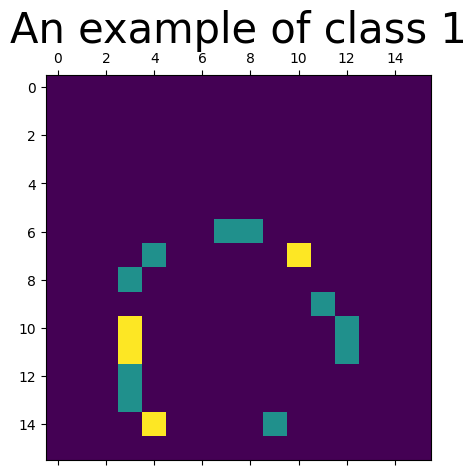

In [ ]:
import matplotlib.pyplot as plt

to_plot = 10
def plot_example(image,lab):
  f,ax = plt.subplots(1,1,figsize=(5,5))
  ax.matshow(image)
  ax.set_title("An example of class {}".format(np.argmax(lab)), fontsize=30)
  print(np.unique(image))
plot_example(x_all[to_plot,:,:], y_all[to_plot])

# Plot a histogram of the average intensity per class

## A trick:

When you do this kind of data visualization, you are creating a lot of variables. If you wrap your code in a function you will keep the workspace clean.

This should be [N,1] :  (20000,)


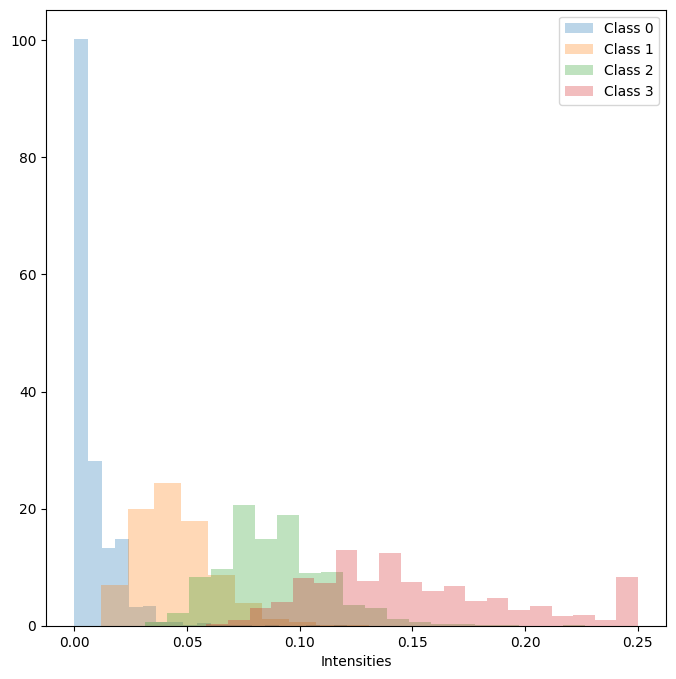

In [ ]:
def plot_histo(x_all, y_all):

  classes = np.argmax(y_all, axis=1)

  intensities = x_all.reshape(x_all.shape[0], -1).mean(axis=1) # [N of elements, 16*16] taking the average over the 2nd dim (axis=1)
  print("This should be [N,1] : ", intensities.shape)

  f,ax = plt.subplots(1,1,figsize=(8,8))
  for c in [0,1,2,3]:
    ax.hist(intensities[classes==c], 20, alpha=0.3, label="Class {}".format(c), density=True)

  ax.set_xlabel("Intensities")
  ax.legend()

plot_histo(x_all,y_all)

This should be [N,1] :  (18402,)


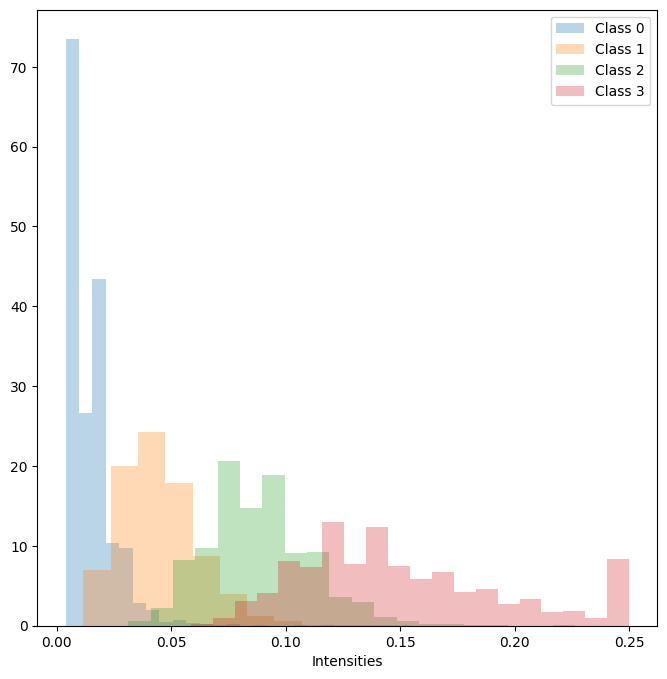

In [ ]:
# Remove the empty images
def remove_empty(x_all,y_all):
  intensities = x_all.reshape(x_all.shape[0],-1).sum(axis=1)
  y_all = y_all[intensities > 0]
  x_all = x_all[intensities > 0]
  return x_all, y_all

x_all, y_all = remove_empty(x_all, y_all)
plot_histo(x_all, y_all)

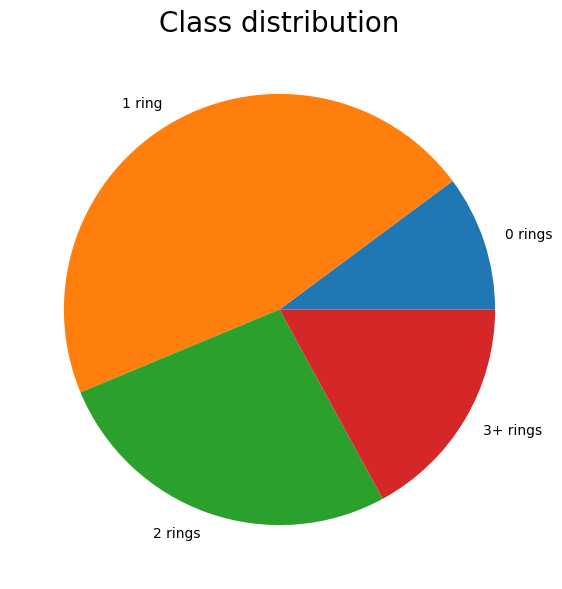

In [ ]:
def piechartclasses(y_all):
  classes = np.argmax(y_all, axis=1)
  c = np.unique(classes)
  arr_c = [np.mean(classes==i) for i in c]

  # Creating plot
  fig = plt.figure(figsize=(10,7))
  plt.pie(arr_c, labels=["0 rings", "1 ring", "2 rings", "3+ rings"])

  # Show plot
  plt.title("Class distribution", fontsize=20)
  plt.show()

piechartclasses(y_all)

In [ ]:
class Parent(): # This is a class

  def __init__(self):
    self.name = None
    self.introduction = "Hi,son . "

  def give_name(self,name): # This is a method of Parent class
    self.name = name

  def speak(self):
    if self.name is not None:
      print(self.introduction + "I am {}".format(self.name))
    else:
      print("give name first")

class Child(Parent): # This is a child class. It has the same methods of Parent

  def __init__(self): # Init is replaced. Everything is the same
    self.name = None
    self.introduction = "Hi,Mama . "

In [ ]:
mama = Parent() # Create a instance of class Parent
mama.give_name("Marta") # Use a method (give name is a "function" inside the class)
son = Child() # Create a instance of class Child
son.give_name("Andrea") # We can use methods from the parent class

mama.speak() # He can speak!
son.speak() # He also can speak!

Hi,son . I am Marta
Hi,Mama . I am Andrea


# Load images and prepare batches

In [26]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.utils.data as data

# Data augmentation
def remove_a_hit(image):
  if image.sum() < 3:
    return image
  a,b = np.nonzero(image)
  i = np.random.randint(0,len(a))
  image[a[i],b[i]] -= 1
  return image

def add_a_hit(image):
  image[np.random.randint(0,16),np.random.randint(0,16)] += 1
  return image

def flip_hit(image):
  if np.random.rand() > 0.5:
    image = np.fliplr(image)
  else:
    image = np.flipud(image)
  return image

def sum_images(image,lab,image2,lab2):
  lab = np.argmax(lab)
  lab2 = np.argmax(lab2)
  image = image + image2
  lab = lab + lab2
  if lab > 3:
    lab = 3
  lab_tmp = np.zeros(4)
  lab_tmp[lab] = 1
  return image, lab_tmp


class HitImageGenerator(Dataset):

  def __init__(self, X, y, AUGMENT=False):
    self.X = X
    self.y = y
    self.AUGMENT = AUGMENT

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    image = self.X[idx]
    label = self.y[idx]
    iclass = np.argmax(label)

    if self.AUGMENT: # A simple data augmentation (only for training)
      if iclass > 1:
        if np.random.rand() > 1: # Validation shows it may be not helpful so turned off (rand() between [0,1))
          image = remove_a_hit(image)
      if np.random.rand() > 1: # Validation shows it may be not helpful so turned off (rand() between [0,1))
        image = add_a_hit(image)
      if np.random.rand() > 0.5: # This seems helpful
        image = flip_hit(image)
      if np.random.rand() > 0.85:
        id2 = np.random.randint(len(self.X))
        image2 = self.X[id2]
        lab2 = self.y[id2]
        image, label = sum_images(image,label,image2,lab2)

    image = image/image.sum() # Normalization
    tensor_image = torch.from_numpy(image).unsqueeze(0).float()
    tensor_label = torch.from_numpy(label).float()
    return tensor_image, tensor_label


class BalanceDataLoader(data.DataLoader):

  def __init__(self, dataset, batch_size=1, shuffle=True):
    self.dataset = dataset
    self.batch_size = batch_size
    self.shuffle = shuffle

    #If sample is not provided, create a new one

    # Count the number of samples in each class
    class_counts = torch.bincount(torch.tensor(np.argmax(dataset.y,axis=1)))

    # Compute the weight of each sample
    weights = 1.0 / class_counts[np.argmax(dataset.y,axis=1)] # Has the same length on the data array

    # Create a sampler that samples each class with equal probability
    sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights))

    super().__init__(dataset, batch_size=batch_size, sampler=sampler)

[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]


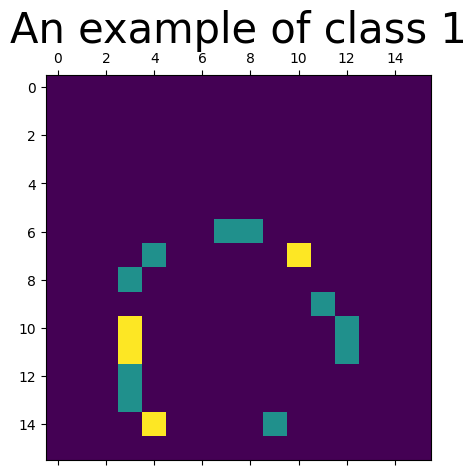

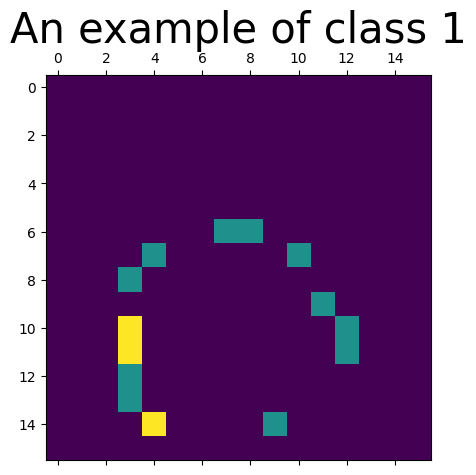

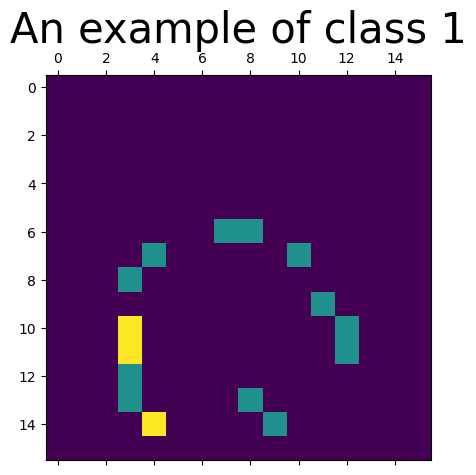

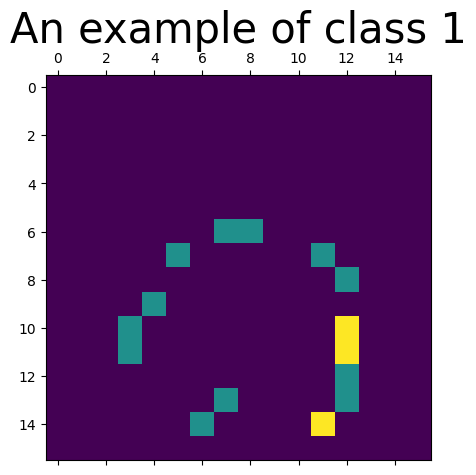

In [27]:
if 1: # Print the augmentation effect (inside if to avoid changes in dataset already clean)
  image = x_all[10,:,:]
  lab = y_all[10]
  plot_example(image,lab)
  plot_example(remove_a_hit(image),lab)
  plot_example(add_a_hit(image),lab)
  plot_example(flip_hit(image),lab)

In [28]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=42)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now you have X_train, y_train, X_val, y_val, X_test and y_test as your splits
# Lets split the dataset

train_dataset = HitImageGenerator(X_train, y_train, AUGMENT=True)
train_loader = BalanceDataLoader(train_dataset, batch_size=128, shuffle=True)

val_dataset = HitImageGenerator(X_val, y_val)
val_loader = BalanceDataLoader(val_dataset, batch_size=128, shuffle=False)

test_dataset = HitImageGenerator(X_test, y_test)
test_loader = BalanceDataLoader(test_dataset, batch_size=64, shuffle=False) # No balanced generator for the test

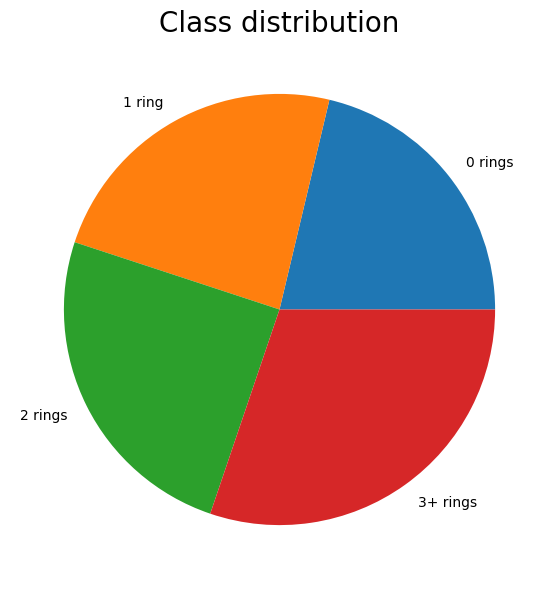

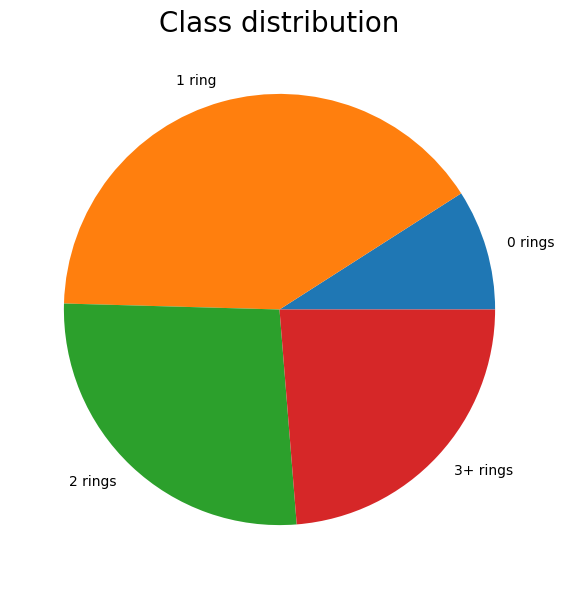

In [29]:
if 1: # Debug to show the dataloader effect
  balanced = []
  notbalanced = []
  tmp_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
  for _, lab in train_loader:
    balanced.extend(lab.numpy())
  for _, lab in tmp_loader:
    notbalanced.extend(lab.numpy())

  piechartclasses(balanced) # With balanced dataloader
  piechartclasses(notbalanced) # Without balanced dataloader

In [30]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,16,2) # 4*4*32 + 32 N parameter of the first conv layer
    self.conv1_1 = nn.Conv2d(16,16,2)
    self.conv1_2 = nn.Conv2d(16,32,2)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(32,32,2)
    self.conv2_1 = nn.Conv2d(32,64,2)
    self.conv2_2 = nn.Conv2d(64,64,2)
    self.fc1 = nn.Linear(64,64) # 64*64 64
    self.fc2 = nn.Linear(64,64)
    self.dpo1 = nn.Dropout(p=0.3)
    self.fc3 = nn.Linear(64,4)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv1_1(x)
    x = F.relu(x)
    x = self.conv1_2(x)
    x = F.relu(x)
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv2_1(x))
    x = self.pool(F.relu(self.conv2_2(x)))
    x = torch.flatten(x,1) # Flatten all dimensions except batch
    x = F.relu(self.fc1(x))
    x = self.dpo1(x)
    x = F.relu(self.fc2(x))
    x = self.dpo1(x)
    x = self.fc3(x) # The crossentropy loss in pytorch to the softmax for you

    return x

model = Net()

In [31]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() # I want to minimize it
optimizer = optim.Adam(model.parameters(), lr=0.003)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

In [32]:
def accuracy(y_pred, y_true):
  """
  Calculates the accuracy of the predicted labels.

  Args:
      y_pred (torch.Tensor): predicted labels
      y_true (torch.Tensor): true labels

  Returns:
      float: accuracy score
  """
  # Get the predicted class by finding the index of the maximum value along axis 1
  y_pred = torch.argmax(y_pred, axis=1)
  y_true = torch.argmax(y_true, axis=1)

  # Calculate the number of correctly classified examples
  correct = (y_pred == y_true).sum().item()

  # Calculate the total number of examples
  total = len(y_true)

  # Calculate the accuracy
  acc = correct / total

  return acc

In [33]:
# Define the number of epochs and the patience for early stopping
num_epochs = 120
patience = 20

# Initialize the variables for tracking the best validation accuracyand the number of epochs since the best accuracy
best_val_acc = 0.0
epochs_since_best_val_acc = 0

train_curve = []
val_curve = []
lr_curve = []

# Train loop
for epoch in range(num_epochs): # The network train on all the elements
  # Training
  model.train()
  tmp_loss = 0

  for batch_idx, (data, target) in enumerate(train_loader): # Divide the problem in batches
    # Forward pass
    output = model(data) # Output will be something [batch,4]
    loss = criterion(output, target)

    # Backward pass and optimization
    optimizer.zero_grad() # Clear the previous gradients
    loss.backward() # Compute gradient of loss
    optimizer.step() # Update the weights

    tmp_loss += loss.detach().numpy()

  if epoch > 20:
    scheduler.step()

  lr_curve.append(optimizer.param_groups[0]['lr'])
  train_curve.append(tmp_loss/len(train_loader))
  # Validation
  model.eval() # The validation step do NOT change the parameters
  with torch.no_grad():
    val_acc = 0.0
    val_total = 0
    val_loss = 0
    for data, target in val_loader:
      output = model(data)
      val_loss += criterion(output, target).item()
      val_acc += accuracy(output, target)

    val_acc /= len(val_loader)
    val_loss /= len(val_loader)
    val_curve.append(val_loss)

    print(f"Epoch {epoch+1}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}, lr: {optimizer.param_groups[0]['lr']:.3e}")

    # Check if the validation accuracy has improved
    if val_acc > best_val_acc:
      best_val_acc = val_acc
      epochs_since_best_val_acc = 0
      best_weights = model.state_dict()
      torch.save(best_weights, 'results/best_weights.pth')
      print("Best!")
      best_epoch = epoch
    else:
      epochs_since_best_val_acc += 1

    # Check if early stopping is necessary
    if epochs_since_best_val_acc >= patience:
      print("Early stopping!")
      break


Epoch 1, Validation Loss: 0.9920, Validation Accuracy: 0.5579, lr: 3.000e-03
Best!
Epoch 2, Validation Loss: 0.7972, Validation Accuracy: 0.6631, lr: 3.000e-03
Best!
Epoch 3, Validation Loss: 0.6685, Validation Accuracy: 0.7135, lr: 3.000e-03
Best!
Epoch 4, Validation Loss: 0.6137, Validation Accuracy: 0.7396, lr: 3.000e-03
Best!
Epoch 5, Validation Loss: 0.5717, Validation Accuracy: 0.7520, lr: 3.000e-03
Best!
Epoch 6, Validation Loss: 0.5538, Validation Accuracy: 0.7633, lr: 3.000e-03
Best!
Epoch 7, Validation Loss: 0.5728, Validation Accuracy: 0.7445, lr: 3.000e-03
Epoch 8, Validation Loss: 0.5523, Validation Accuracy: 0.7747, lr: 3.000e-03
Best!
Epoch 9, Validation Loss: 0.5888, Validation Accuracy: 0.7461, lr: 3.000e-03
Epoch 10, Validation Loss: 0.5252, Validation Accuracy: 0.7786, lr: 3.000e-03
Best!
Epoch 11, Validation Loss: 0.5436, Validation Accuracy: 0.7699, lr: 3.000e-03
Epoch 12, Validation Loss: 0.5396, Validation Accuracy: 0.7822, lr: 3.000e-03
Best!
Epoch 13, Validatio

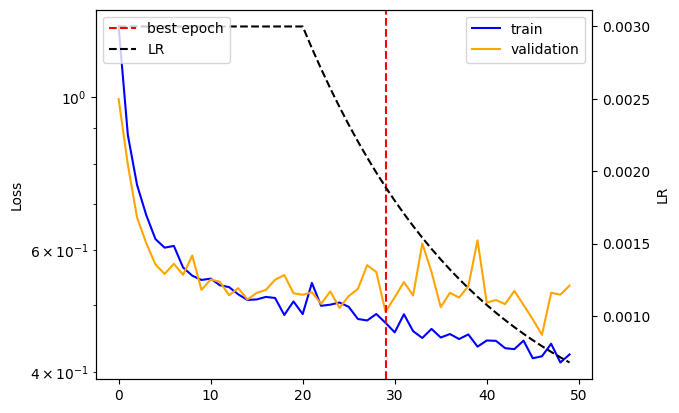

In [35]:
f, ax =plt.subplots(1,1)

ax2 = ax.twinx()
ax.plot(train_curve, label="train", color="blue")
ax.plot(val_curve, label="validation", color="orange")
ax2.axvline(best_epoch, color="r", linestyle="--", label="best epoch")
ax.legend()
ax.set_ylabel("Loss")

ax2.plot(lr_curve, "k--", label="LR")
ax2.legend(loc=2)
plt.xlabel("Epochs")
ax2.set_ylabel("LR")
ax.set_yscale("log")

In [36]:
model = Net()
model.load_state_dict(torch.load('results/best_weights.pth'))
model.eval()

Net(
  (conv1): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1))
  (conv1_1): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1))
  (conv1_2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1))
  (conv2_1): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
  (conv2_2): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (dpo1): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def test_model(model, test_loader):
  model.eval()

  y_true = []
  y_pred = []

  with torch.no_grad():
    for inputs, targets in test_loader:
      outputs = model(inputs)
      targets = targets.numpy()
      outputs = outputs.numpy()

      predicted = np.argmax(outputs, 1)
      targets = np.argmax(targets, 1)

      y_true.extend(targets)
      y_pred.extend(predicted)

  cm = confusion_matrix(y_true, y_pred, normalize="true")
  return np.array(y_true), np.array(y_pred), cm

In [38]:
_, _, cm = test_model(model, test_loader)

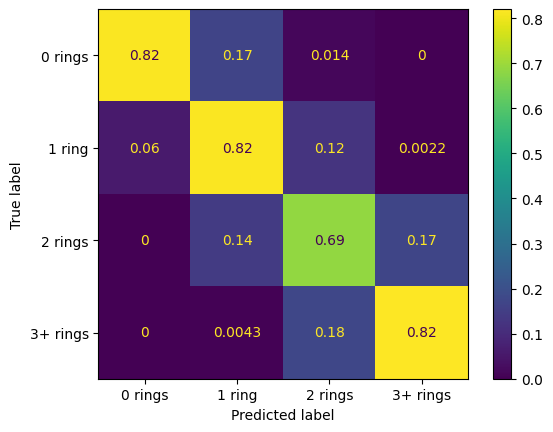

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0 rings", "1 ring", "2 rings", "3+ rings"])
disp.plot()
plt.show()